In [1]:
from main_VM import get_p_value_user_no_plot, get_p_value_user
import pandas as pd
import numpy as np
from collections import defaultdict
from datetime import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
class AutoVivification(dict):
    """Implementation of perl's autovivification feature."""
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

In [3]:
trx_train = pd.read_csv('test_data/test_assessment.csv', header=0)
trx_train.DATE_TIMESTAMP_FIX = pd.to_datetime(trx_train.DATE_TIMESTAMP_FIX)

account = np.random.choice(trx_train.D_RPPUSERID_REAL.unique())
print(account)
account = '29af5857-e772-4c4b-9544-68d3c8eb33ef'
trx_ = trx_train[trx_train['D_RPPUSERID_REAL'] == account]

print(f'RPP_USER_ID: {account}')

n = 256
timestamps = trx_.DATE_TIMESTAMP_FIX.values
time_segments = ['hour', 'daymonth', 'dayweek']

print(f'Transactions between: {np.min(timestamps)} and {np.max(timestamps)}')

0c72d458-d55e-4c2d-b8c3-dda6f87c9024
RPP_USER_ID: 29af5857-e772-4c4b-9544-68d3c8eb33ef (Alejo)
Transactions between: 2021-12-31T19:38:57.000000000 and 2022-06-14T08:36:15.000000000


301.4513550968372 hour
499.9999865216339 daymonth
216.5820979946268 dayweek
Results periodic time analyzers 
Number trx = 160
Risk pvalue hour = 0.001763634441870928
Risk pvalue daymonth = 0.9999983586906064
Risk pvalue dayweek = 0.997981477107275



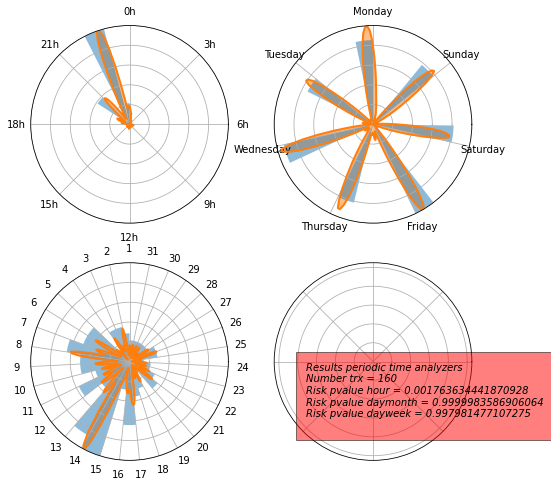

defaultdict(list,
            {'hour': [256, 160, 301.4513550968372, 0.001763634441870928],
             'daymonth': [256, 160, 499.9999865216339, 0.9999983586906064],
             'dayweek': [256, 160, 216.5820979946268, 0.997981477107275]})

In [5]:
get_p_value_user(n, timestamps, time_segments, plot=True)

In [4]:
results = get_p_value_user_no_plot(n, timestamps, time_segments)

In [5]:
results

defaultdict(list,
            {'hour': [256,
              106,
              95.29546205651741,
              0.9829727909883934,
              0.43266725540161133],
             'daymonth': [256,
              106,
              139.09986792015746,
              0.9772892051863233,
              0.310791015625],
             'dayweek': [256,
              106,
              250.11489502896515,
              0.94449447044562,
              0.4602928161621094]})

### Now, for more users

In [6]:
trx_train = pd.read_csv('test_data/test_assessment.csv', header=0)
trx_train.DATE_TIMESTAMP_FIX = pd.to_datetime(trx_train.DATE_TIMESTAMP_FIX)

definitive_dict = AutoVivification()

users = trx_train.D_RPPUSERID_REAL.unique()
months = ['06', '05', '04', '03', '02', '01']
ns = [256, 512, 1024]

for user in users:
    print(f'RPP_USER_ID: {user}')
    for month in months:
        try:
            for n in ns:
                string = f"01/{month}/2022"
                element = datetime.strptime(string,"%d/%m/%Y")
                trx_ = trx_train[trx_train['DATE_TIMESTAMP_FIX'] >= element]
                trx_ = trx_[trx_['D_RPPUSERID_REAL'] == user]

                timestamps = trx_.DATE_TIMESTAMP_FIX.values
                time_segments = ['hour', 'daymonth', 'dayweek']
                definitive_dict[user][(len(months) - int(month)) + 1][n] = get_p_value_user_no_plot(n, timestamps, time_segments)
        except:
            pass

RPP_USER_ID: 01d7081a-df69-47fc-987e-c5f43c906cf0
RPP_USER_ID: 046a2068-ac20-4a3f-84b1-71b5da5d6ddc
RPP_USER_ID: 0572c393-b244-4d89-89aa-7cc4dc4ce426
RPP_USER_ID: 05b0ec9c-8c3d-4c59-9038-f31dcf6fd4bf
RPP_USER_ID: 0707ea40-c36b-43a8-8e93-4f5c60cc3bd6
RPP_USER_ID: 077ce28f-61b9-458a-a81d-7c86af91f380
RPP_USER_ID: 078888d6-636c-445b-a50d-39b0ade0d78b
RPP_USER_ID: 092367d9-3938-458b-96fa-36af8fdf15d7
RPP_USER_ID: 0998ca8b-d6a4-4b82-ba22-cbeee2132edb
RPP_USER_ID: 0a18262f-7ee5-44fb-bc5b-7cf11aec84b1
RPP_USER_ID: 0b08e2d4-f6e3-4027-9e8e-905f56fdc63a
RPP_USER_ID: 0b5a249e-3c3f-4f3b-b37f-331c9e1f29e3
RPP_USER_ID: 0c72d458-d55e-4c2d-b8c3-dda6f87c9024
RPP_USER_ID: 0c76e4d1-9b17-4475-9336-07acd1373036
RPP_USER_ID: 0cc27806-0f4d-4704-a504-821dd9506c39
RPP_USER_ID: 0cf4c1ed-6767-4765-8f17-a393441afefc
RPP_USER_ID: 0d78f70f-e382-40a1-bdc3-05c10d87fc64
RPP_USER_ID: 0dbd7e40-db5e-4951-af42-214c82f62276
RPP_USER_ID: 0e4d6af7-85bf-4079-b68b-e8f01d60aa30
RPP_USER_ID: 0e94a9fa-d4f2-4e9d-874d-003cc4d9f82d


In [8]:
definitive_dict

{'01d7081a-df69-47fc-987e-c5f43c906cf0': {6: {256: defaultdict(list,
               {'hour': [256,
                 3,
                 0.10000571943076664,
                 0.34587937204507213,
                 0.03248929977416992],
                'daymonth': [256,
                 3,
                 3.161389434514959,
                 0.3681383556578304,
                 0.023277997970581055],
                'dayweek': [256,
                 3,
                 0.10000571943076664,
                 0.3457317473624791,
                 0.038417816162109375]}),
   512: defaultdict(list,
               {'hour': [512,
                 3,
                 0.10000571943076664,
                 0.3420894313543791,
                 0.03740692138671875],
                'daymonth': [512,
                 3,
                 3.161389434514959,
                 0.3478574293853571,
                 0.029688119888305664],
                'dayweek': [512,
                 3,
                 0.

In [18]:
definitive_dict['01d7081a-df69-47fc-987e-c5f43c906cf0'][6][256]

defaultdict(list,
            {'hour': [256,
              3,
              0.10000571943076664,
              0.34587937204507213,
              0.03744387626647949],
             'daymonth': [256,
              3,
              3.161389434514959,
              0.3681383556578304,
              0.023820161819458008],
             'dayweek': [256,
              3,
              0.10000571943076664,
              0.3457317473624791,
              0.03232693672180176]})

In [7]:
import pickle

In [10]:
with open("data_to_df.pkl", "wb") as pkl_handle:
	pickle.dump(dict(definitive_dict), pkl_handle)

In [98]:
# LOAD
with open("data_to_df.pkl", "rb") as pkl_handle:
	output = pickle.load(pkl_handle)


In [99]:
output['01d7081a-df69-47fc-987e-c5f43c906cf0'][6][256] == definitive_dict['01d7081a-df69-47fc-987e-c5f43c906cf0'][6][256]

True

In [100]:
output[list(output.keys())[20]]

{1: {256: defaultdict(list,
              {'hour': [256,
                2,
                499.99998559380964,
                0.24876952971615848,
                0.015013694763183594],
               'daymonth': [256,
                2,
                499.9999857836173,
                0.20679541800826318,
                0.014770984649658203],
               'dayweek': [256,
                2,
                499.99998577997496,
                0.24876952976460007,
                0.01468515396118164]}),
  512: defaultdict(list,
              {'hour': [512,
                2,
                499.99998559380964,
                0.2718105570773197,
                0.01470494270324707],
               'daymonth': [512,
                2,
                499.9999857836173,
                0.1272931183796686,
                0.015354156494140625],
               'dayweek': [512,
                2,
                499.99998577997496,
                0.12729311837935614,
                

### Build dataframe with resulting dict

In [101]:
def get_df_time_segment(output, segment):
    df = pd.DataFrame()
    for user in list(output.keys()):
        for i in range(1,7):
            row = []
            for n in [256, 512, 1024]:
                for t in segment:
                    if len(list(output[user][i][n][t])) > 0:
                        row.append([user] + [i] + list(output[user][i][n][t]) + [t])
            df = df.append(row)
    df.columns = ['RPP_USER_ID', 'MONTHS', 'N', 'N_TRX', 'B_WIDTH', 'P_VALUE', 'SEC', 'SEG']
    return df

In [102]:
df = get_df_time_segment(output, ['hour', 'dayweek', 'daymonth'])

In [103]:
df.head()

,RPP_USER_ID,MONTHS,N,N_TRX,B_WIDTH,P_VALUE,SEC,SEG
0,01d7081a-df69-47fc-987e-c5f43c906cf0,6,256,3,0.100006,0.345879,0.037444,hour
1,01d7081a-df69-47fc-987e-c5f43c906cf0,6,256,3,0.100006,0.345732,0.032327,dayweek
2,01d7081a-df69-47fc-987e-c5f43c906cf0,6,256,3,3.161389,0.368138,0.023820,daymonth
3,01d7081a-df69-47fc-987e-c5f43c906cf0,6,512,3,0.100006,0.342089,0.038045,hour
4,01d7081a-df69-47fc-987e-c5f43c906cf0,6,512,3,0.100006,0.336899,0.038430,dayweek


In [104]:
df.to_csv('total_df_current_implementation.csv', index=False)